In [1]:
import pandas as pd
import os, datetime
import matplotlib.pyplot as plt

In [2]:
file = 'pitches.csv'
p_df = pd.read_csv(os.path.join('data', 'total', file))
p_df.tail()

,Num,Pitch,Type,MPH,play-hitzone,play-bases,play-field,Pitcher,Pitching Team,Batting Team,Inning,Event Id,Game
3752693,4,Double,Sinker,95,top: 9.5px; right: 17.22px;,2.0,top: 11.38px; right: 28.12px;,Jansen,LAD,PIT,Top 9th,97,401228841
3752694,1,Strike Looking,Cutter,93,top: 15.14px; right: 19.67px;,2.0,NaN,Jansen,LAD,PIT,Top 9th,98,401228841
3752695,2,Ground Out,Cutter,93,top: 12.75px; right: 27.2px;,3.0,top: 16.95px; right: 16.52px;,Jansen,LAD,PIT,Top 9th,98,401228841
3752696,1,Strike Looking,Cutter,93,top: 14.27px; right: 19.06px;,3.0,NaN,Jansen,LAD,PIT,Top 9th,99,401228841
3752697,2,Ground Out,Sinker,95,top: 14.71px; right: 20.89px;,3.0,top: 15.33px; right: 16.4px;,Jansen,LAD,PIT,Top 9th,99,401228841


In [4]:
p_df['Type'].value_counts()

Four-seam FB        797764
Fastball            764687
Slider              654731
Changeup            391659
Curve               354050
Sinker              269474
Cutter              189143
Two-seam FB         149958
--                   65638
Splitter             53243
Knuckle Curve        46622
Knuckleball           8202
Unknown               3367
Intentional Ball      2926
Pitch Out              400
Eephus Pitch           328
Slow Curve             291
Forkball               148
Screwball               67
Name: Type, dtype: int64

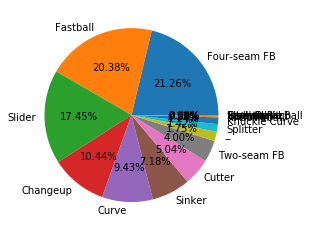

In [3]:
# gets a bit messy right now...
plt.pie(p_df['Type'].value_counts(), labels=p_df['Type'].value_counts().index.tolist(), autopct='%1.2f%%');

In [4]:
# Notes
# fcns for various things?

# Ideas
# least total pitches to get through each inning
# - most pitches through each inning and still throwing a complete game/no-no

# most balls/strikes in a row

# most 3 strike strikeous in a game
# avg pitches per at bat
# fewest pitches to get a number of hits
# - ex. hitter got a hit on each of first three hits he saw

## prevalence of triples (or any outcome of pitches)

In [5]:
# go through each year
pitch_outcome_dict = {}
for year in range(2017, 2021): 
    pitching_df = pd.read_csv(os.path.join('data', str(year), 'pitches.csv'))
    pitch_outcome_dict[year] = pitching_df['Pitch'].value_counts()

C:\Users\Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
[pitch_outcome_dict[year]['Triple'] for year in range(2017, 2021)]

[807, 852, 840, 249]

## pitch types from year to year

In [7]:
pitch_type_dict = {}
for year in range(2017, 2021): 
    pitching_df = pd.read_csv(os.path.join('data', str(year), 'pitches.csv'))
    pitch_type_dict[year] = pitching_df['Type'].value_counts()

In [8]:
pitch_type = 'Knuckle Curve'
[pitch_type_dict[year][pitch_type] if pitch_type in pitch_type_dict[year].keys() else 0 for year in range(2017, 2021)]

[0, 15403, 14212, 6455]

In [9]:
pitching_df[pitching_df['Pitching Team'] == 'MIL']['Pitcher'].value_counts()

Woodruff         1297
Burnes           1009
Houser            956
Lindblom          790
Anderson          752
Peralta           571
Suter             567
Yardley           443
Williams          431
Hader             391
Claudio           331
Rasmussen         323
Knebel            263
Lauer             244
Phelps            204
Feyereisen        150
Topa              146
Grimm             110
Perdomo            85
Black              67
Wahl               38
Bickford           33
Orlando Arcia      30
Gyorko             11
Name: Pitcher, dtype: int64

In [10]:
pitching_df[pitching_df['Pitcher'] == 'Burnes']['Type'].value_counts()

Cutter          326
Sinker          206
Four-seam FB    147
Slider          132
Changeup        110
Curve            88
Name: Type, dtype: int64

### To Get CSVs with subset of modified data

In [40]:
strike_calls = ['Strike Looking', 'Strike Swinging', 'Foul Ball', 
                'Ground Out', 'Fly Out', 'Line Out', 'Pop Out', 
                'Foul Out', 'Bunted Foul', 'Sacrifice Fly', 'Sacrifice', 
                'Batters Fielders Choice (runner Out)', 'Bunt Ground Out', 
                'Bunt Pop Out', 'Strikeout Batter Safe, Passed Ball']

hit_calls = ['Single', 'Double', 'Triple', 'Home Run', 'Ground Rule Double', 
             'Bunt Single', 'Bunt Double', 'Inside The Park Home Run']

ball_calls = ['Ball', 'Hit By Pitch', 'Wild Pitch; Runner Reached', 'Intentional Ball']
error_calls = ['Batter Reached On Error (batter To First)', 'Catchers Interference (batter To First/error)']
other_calls = ['Batters Fielders Choice (all Runners Safe)', 'Batters Interference (batter Out)', 
               'Official Ruling Pending']

def changeOutcome(x):
    if x in strike_calls:
        return 'Strike'
    elif x in hit_calls:
        return 'Hit'
    elif x in ball_calls:
        return 'Ball'
    else:
        return 'Other'

In [68]:
# could loop this over team abbreviations
# - only other thing to change would be folder the csvs are stored in (in next cell)

team_abbr = 'MIL'

brewers_df = pd.read_csv(os.path.join('data', '2021', 'pitches.csv'))
brewers_df = brewers_df[brewers_df['Pitching Team'] == team_abbr]

# write pitcher csvs
for pitcher in brewers_df['Pitcher'].unique():
    temp = brewers_df[brewers_df['Pitcher']==pitcher][['Pitch', 'Type', 'MPH', 'Game']]
    # temp['Inning'] = temp['Inning'].apply(lambda x: x.split(' ')[1][:-2])
    
    # to get the pitcher's pitch count in the game
    pitch_counts = []
    gameid = -1
    for i, row in temp.iterrows():
        if gameid != row['Game']:
            pc = 1
            gameid = row['Game']
        else:
            pc += 1
        pitch_counts.append(pc)
    
    temp['Count'] = pitch_counts
    temp['Pitch'] = temp['Pitch'].apply(lambda x: changeOutcome(x))
    temp[['Pitch', 'Type', 'MPH', 'Count']].to_csv(os.path.join('for_unity', 'brewers', pitcher+'.csv'), index=False, header=False)

In [22]:
# write list of pitchers
with open(os.path.join('for_unity', 'brewers', 'pitchers.txt'), 'w') as f: 
    for pitcher in brewers_df['Pitcher'].unique().tolist():
        f.write(pitcher+'\n')

In [28]:
# examples of what the data looks like after being modified
brewers_df[brewers_df['Pitcher']=='Burnes'][['Pitch', 'Type', 'MPH', 'Inning']]

,Pitch,Type,MPH,Inning
9017,Strike Looking,Sinker,97,Top 1st
9018,Ball,Curve,81,Top 1st
9019,Foul Ball,Sinker,98,Top 1st
9020,Foul Ball,Cutter,97,Top 1st
9021,Ball,Cutter,97,Top 1st
...,...,...,...,...
375692,Foul Ball,Cutter,93,Bottom 6th
375693,Ball,Curve,78,Bottom 6th
375694,Double,Cutter,93,Bottom 6th
375695,Foul Ball,Slider,89,Bottom 6th


In [38]:
brewers_df[brewers_df['Pitcher']=='Burnes']['Pitch'].apply(lambda x: changeOutcome(x))

9017      Strike
9018        Ball
9019      Strike
9020      Strike
9021        Ball
           ...  
375692    Strike
375693      Ball
375694       Hit
375695    Strike
375696       Hit
Name: Pitch, Length: 1362, dtype: object